# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings

from imblearn.over_sampling import SMOTE


#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [6]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'yellowbrick'

In [7]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [8]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset

In [9]:
#point to the folder where the data is stored
os.chdir("/home/ciro/datathon")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('df_baseline.csv')


#pandas profiling report for train_consolidated exporting a file
profile = ProfileReport(train_consolidated, title='Pandas Profiling Report', explorative=True)
profile.to_file("train_consolidated.html")


In [10]:
train_consolidated.head(1)

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm)
0,489616,5,0.0,2013.0,0.0,1.0,1,21.4,16.0,0.0,0,0,0.1575,1.542199,0.0,0.0,0,1,0,0,0,1,0,0.003969,60.715264,0.16,0.545833,107.5,24.985868


In [11]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [12]:
del train_consolidated

In [13]:
df_baseline.head(1)

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm)
0,489616,5,0.0,2013.0,0.0,1.0,1,21.4,16.0,0.0,0,0,0.1575,1.542199,0.0,0.0,0,1,0,0,0,1,0,0.003969,60.715264,0.16,0.545833,107.5,24.985868


In [14]:
#count values for Incidence
df_baseline['Incidence'].value_counts()


0.0    5438615
1.0       7716
Name: Incidence, dtype: int64

# PCA approach


In [15]:
# perform pca on df_baseline and split the data into train and test 80 20stratifying by the target variable Incidence
pca = PCA(n_components=2)
X = df_baseline.drop(['Incidence'], axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


: 

: 

In [ ]:
#xgboost classifier using gpu 
xgb = XGBClassifier()
xgb.fit(X_train_pca, y_train)
y_pred = xgb.predict(X_test_pca)
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb.score(X_test_pca, y_test)))

#confusion matrix
confusion_matrix(y_test, y_pred)


In [11]:
#DO NOT RUN TAKES TOO LONG
#random forest classifier with regularization and gridsearch to find the best parameters for the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [200, 300],
    'max_features': ['log2', 'sqrt'],
    'max_depth' : [4,5,6],
    'criterion' :['gini'],
    'class_weight': ['balanced', 'balanced_subsample'],
    'min_samples_leaf': [1, 2]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

#best parameters for the model
CV_rfc.best_params_

#best score for the model
CV_rfc.best_score_

#predicting the target variable for the test set

y_pred = CV_rfc.predict(X_test)

#confusion matrix

confusion_matrix(y_test, y_pred)

#classification report

print(classification_report(y_test, y_pred))

#roc auc score

roc_auc_score(y_test, y_pred)

#plotting the roc curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()




: 

: 

In [ ]:

CV_rfc.best_params_


In [ ]:
y_pred = CV_rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()


RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1087724
         1.0       1.00      1.00      1.00      1543

    accuracy                           1.00   1089267
   macro avg       1.00      1.00      1.00   1089267
weighted avg       1.00      1.00      1.00   1089267

[[1087724       0]
 [      0    1543]]
1.0


<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

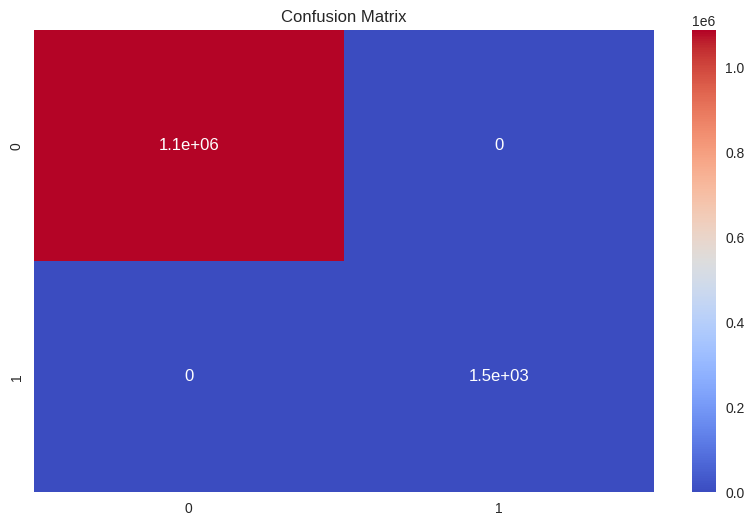

In [12]:

#rfc with some parameters
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_features='auto', max_depth=8, criterion='gini')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()



In [13]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

In [14]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

1.0


In [18]:
#change directory to
os.chdir('/home/ciro/datathon/Datathon-Rules-and-Documentation')
#import a file
submission = pd.read_csv('sample_submission.csv')

In [19]:
submission.head(10)

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0
5,428837983,0
6,428837841,0
7,428838331,0
8,1200432,0
9,1200564,0


In [20]:
submission.shape

(909733, 2)

In [21]:
#for all PipeId in submission, join  with df_baseline on PipeId
submission2 = submission.merge(df_baseline, on='PipeId', how='left')

In [22]:
#compute differences in PipeId between submission and submission2
np.setdiff1d(submission['PipeId'].unique(), submission2['PipeId'].unique())

array([], dtype=int64)

In [23]:
#show duplicates for PipeId in submission2
submission2[submission2.duplicated(['PipeId'], keep=False)]


,PipeId,Incidence_x,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence_y,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm)
0,446859944,0,4.00,0.00,2013.00,0.00,1.00,1.00,20.75,12.00,0.00,0.00,0.00,0.73,15.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,1961.25,0.02,0.64,113.20,239.83
1,446859944,0,4.00,0.00,2015.00,0.00,3.00,1.00,20.75,24.00,0.00,0.00,0.00,0.73,15.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,1961.25,0.02,0.64,113.20,239.83
2,446859944,0,4.00,0.00,2017.00,0.00,5.00,1.00,20.75,24.00,0.00,0.00,0.00,0.73,15.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,1961.25,0.02,0.64,113.20,239.83
3,446859944,0,4.00,0.00,2019.00,0.00,7.00,1.00,20.75,23.00,0.00,0.00,0.00,0.73,15.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,1961.25,0.02,0.64,113.20,239.83
5,438428871,0,4.00,0.00,2013.00,0.00,1.00,1.00,20.75,12.00,0.00,0.00,0.00,0.73,4.69,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,184.28,0.02,0.64,113.20,239.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580007,228228379,0,5.00,0.00,2012.00,0.00,8.00,1.00,24.00,24.00,0.00,0.00,0.00,0.04,1.17,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.03,5.41,16.00,0.64,113.20,239.83
3580008,228228379,0,5.00,0.00,2014.00,0.00,10.00,1.00,24.00,24.00,0.00,0.00,0.00,0.04,1.17,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.03,5.41,16.00,0.64,113.20,239.83
3580009,228228379,0,5.00,0.00,2016.00,0.00,12.00,1.00,24.00,23.00,0.00,0.00,0.00,0.04,1.17,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.03,5.41,16.00,0.64,113.20,239.83
3580010,228228379,0,5.00,0.00,2018.00,0.00,14.00,1.00,24.00,25.00,0.00,0.00,0.00,0.04,1.17,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.03,5.41,16.00,0.64,113.20,239.83


In [24]:
#keep only the first occurence of PipeId in submission2
submission2.drop_duplicates(subset='PipeId', keep='first', inplace=True)
submission2.shape

(909733, 30)

In [25]:
submission2.head(1)


,PipeId,Incidence_x,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence_y,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm)
0,446859944,0,4.00,0.00,2013.00,0.00,1.00,1.00,20.75,12.00,0.00,0.00,0.00,0.73,15.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,1961.25,0.02,0.64,113.20,239.83


In [26]:
#missing values in submission2
submission2.isnull().sum()
#fill all missing values in submission2 with 0
submission2.fillna(0, inplace=True)


PipeId                                           0
Incidence_x                                      0
No_Inspections                              136906
No_Incidents                                136906
InspectionYear                              136906
preventive_maintenance_rate                 136906
Age_pipe_at_inspection                      136906
pipe_inspected_frequently                   136906
Average_MonthsLastRev                       136906
MonthsLastRev                               136906
Incidence_y                                 136906
NumConnections                              136906
NumConnectionsUnder                         136906
Relative_Thickness                          136906
pipe_area                                   136906
area_connection                             136906
incidence_area                              136906
connection_bool                             136906
gas_natural                                 136906
Material_Acrylonitrile-Butadien

In [27]:
#drop Incidence_x and Incidence_y from submission2
submission2.drop(['Incidence_x', 'Incidence_y'], axis=1, inplace=True)

In [28]:
#make predictions for submission using the model
predictions = rfc.predict_proba(submission2)
predictions = predictions[:, 1]

#add predictions to submission
submission2['Incidence'] = predictions



#show submission
submission2.head(1)


,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),Incidence
0,446859944,4.00,0.00,2013.00,0.00,1.00,1.00,20.75,12.00,0.00,0.00,0.73,15.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,1961.25,0.02,0.64,113.20,239.83,0.00


In [29]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = submission2.drop(['No_Inspections', 'No_Incidents', 'InspectionYear',
       'preventive_maintenance_rate', 'Age_pipe_at_inspection',
       'pipe_inspected_frequently', 'Average_MonthsLastRev', 'MonthsLastRev',
       'NumConnections', 'NumConnectionsUnder', 'Relative_Thickness',
       'pipe_area', 'area_connection', 'incidence_area', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average year Humidity (%)',
       'Yearly Sun Hours (hours)', 'Population density (persons/sqkm)'], axis=1)


In [30]:

#show kaggle_submission
kaggle_submission.head(10)


,PipeId,Incidence
0,446859944,0.00
4,428124500,0.00
5,438428871,0.00
9,429034569,0.00
10,411184477,0.00
11,428837983,0.00
15,428837841,0.00
16,428838331,0.00
20,1200432,0.01
21,1200564,0.00


In [31]:
kaggle_submission.shape

(909733, 2)

In [33]:
#export kaggle_submission to csv
os.chdir("/home/ciro/datathon")

kaggle_submission.to_csv('kaggle_submission_pca4.csv', index=False)


# Using lazypredict to have more baselines


In [31]:
#lazypredict to find the best model
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models



  3%|▎         | 1/29 [00:16<07:38, 16.39s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 16.39087986946106}


  7%|▋         | 2/29 [01:22<20:34, 45.72s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 1.0, 'Balanced Accuracy': 1.0, 'ROC AUC': 1.0, 'F1 Score': 1.0, 'Time taken': 66.24944305419922}


 10%|█         | 3/29 [01:31<12:34, 29.03s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9987285027454242, 'Balanced Accuracy': 0.9993633495261666, 'ROC AUC': 0.9993633495261666, 'F1 Score': 0.9989250361965991, 'Time taken': 9.175599813461304}
